In [1]:
import pandas as pd
dataframe = pd.read_csv("./CC_GENERAL.csv")
dataframe.drop(columns = ["CUST_ID", "TENURE"], inplace=True)
dataframe.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000


In [2]:
missing = dataframe.isna().sum()
print(missing)

BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
dtype: int64


In [3]:
dataframe.fillna(dataframe.median(), inplace=True)
missing = dataframe.isna().sum()
print(missing)

BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
dtype: int64


In [4]:
from sklearn.preprocessing import Normalizer
values = Normalizer().fit_transform(dataframe.values)
print(values)

[[3.93555441e-02 7.87271593e-04 9.17958473e-02 ... 1.94178127e-01
  1.34239194e-01 0.00000000e+00]
 [2.93875903e-01 8.34231560e-05 0.00000000e+00 ... 3.76516684e-01
  9.84037959e-02 2.03923046e-05]
 [3.10798149e-01 1.24560965e-04 9.63068011e-02 ... 7.74852335e-02
  7.81351982e-02 0.00000000e+00]
 ...
 [2.27733092e-02 8.11060955e-04 1.40540698e-01 ... 7.90986945e-02
  8.02156174e-02 2.43318384e-04]
 [2.65257948e-02 1.64255731e-03 0.00000000e+00 ... 1.03579625e-01
  1.09898221e-01 4.92767391e-04]
 [1.86406219e-01 3.33426837e-04 5.46778061e-01 ... 3.15915455e-02
  4.41568390e-02 0.00000000e+00]]


In [5]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=5, n_init=10, max_iter=300)
y_pred = kmeans.fit_predict(values)

In [6]:
from sklearn import metrics
labels = kmeans.labels_
silhouette = metrics.silhouette_score(values, labels, metric = 'euclidean')
print(silhouette)

0.36454314826693845


In [7]:
dbs =  metrics.davies_bouldin_score(values, labels)
print(dbs)

1.075812734747931


In [8]:
calinski = metrics.calinski_harabasz_score(values, labels)
print(calinski)

3431.800540734652


In [9]:
def clustering_algorithm(n_clusters, dataset):
  kmeans = KMeans(n_clusters=n_clusters, n_init = 10, max_iter = 300)
  labels = kmeans.fit_predict(dataset)
  s = metrics.silhouette_score(dataset, labels, metric= 'euclidean')
  dbs = metrics.davies_bouldin_score(dataset, labels)
  calinski = metrics.calinski_harabasz_score(dataset, labels)
  return s, dbs, calinski


In [10]:
s1, dbs1, calinski1 = clustering_algorithm(3, values)
print(s1, dbs1, calinski1)

0.3272203126696238 1.3096073640088426 3526.440519908274


In [11]:
s2, dbs2, calinski2 = clustering_algorithm(5, values)
print(s2, dbs2, calinski2)

0.3644845919974304 1.0757138590613295 3431.7937428414293


In [12]:
s3, dbs3, calinski3 = clustering_algorithm(50, values)
print(s3, dbs3, calinski3)

0.24953256422623837 1.2155460864392456 1618.88119650596


In [13]:
dataframe.count()

BALANCE                             8950
BALANCE_FREQUENCY                   8950
PURCHASES                           8950
ONEOFF_PURCHASES                    8950
INSTALLMENTS_PURCHASES              8950
CASH_ADVANCE                        8950
PURCHASES_FREQUENCY                 8950
ONEOFF_PURCHASES_FREQUENCY          8950
PURCHASES_INSTALLMENTS_FREQUENCY    8950
CASH_ADVANCE_FREQUENCY              8950
CASH_ADVANCE_TRX                    8950
PURCHASES_TRX                       8950
CREDIT_LIMIT                        8950
PAYMENTS                            8950
MINIMUM_PAYMENTS                    8950
PRC_FULL_PAYMENT                    8950
dtype: int64

In [14]:
import numpy as np
random_data = np.random.rand(8950, 16)
s, dbs, calinski = clustering_algorithm(5, random_data)
print(s, dbs, calinski)
print(s2, dbs2, calinski2)

0.040388854619827955 3.4882380374909863 305.0713929091589
0.3644845919974304 1.0757138590613295 3431.7937428414293


In [15]:
set1, set2, set3 = np.array_split(values, 3)
s1, dbs1, calinki1 = clustering_algorithm(5, set1)
s2, dbs2, calinki2 = clustering_algorithm(5, set2)
s3, dbs3, calinki3 = clustering_algorithm(5, set3)
print(s1, dbs1, calinki1)
print(s2, dbs2, calinki2)
print(s3, dbs3, calinki3)

0.36871947128237154 1.0562346825020208 1204.1115110650273
0.35406999696241026 1.1389554530299943 1194.945411949724
0.3669338522621966 1.0987322533743502 1167.5348185515054


<function matplotlib.pyplot.show(close=None, block=None)>

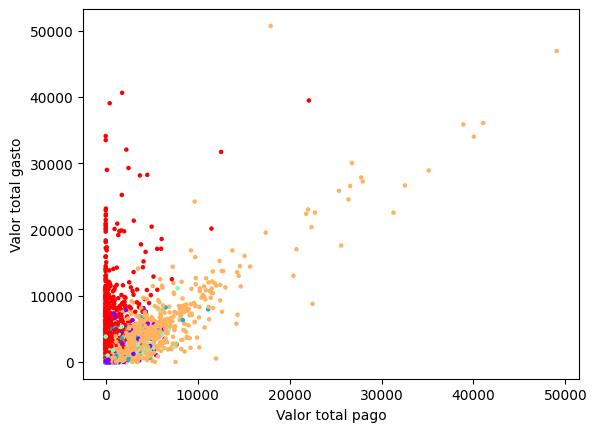

In [16]:
import matplotlib.pyplot as plt
plt.scatter(dataframe ['PURCHASES'], dataframe ['PAYMENTS'], c=labels, s=5, cmap='rainbow')
plt.xlabel('Valor total pago')
plt.ylabel('Valor total gasto')
plt.show

In [17]:
import seaborn as sns
dataframe['cluster'] = labels
# sns.pairplot(dataframe[0:], hue='cluster')


In [18]:
dataframe.groupby('cluster').describe()

BALANCE                                                    \
          count         mean          std        min          25%   
cluster                                                             
0        3280.0   443.746756   846.398201   0.000000    23.365333   
1         411.0  1987.501586  1854.459156  70.794108  1018.958891   
2        2649.0  3037.962543  2478.838161   6.824905  1256.612223   
3        1537.0  1142.320861  1664.363459   0.000000   212.282538   
4        1073.0  1795.328292  1982.485775   0.000000   507.076999   

                                                BALANCE_FREQUENCY            \
                 50%          75%           max             count      mean   
cluster                                                                       
0          82.941478   410.126095   9630.367575            3280.0  0.774389   
1        1337.287314  2138.678431  11670.179850             411.0  0.989486   
2        2174.018945  4223.867789  18495.558550            2649.0  0.963740   
3         555.131027  1370.317105  19043.138560            1537.0  0.928267   
4        1088.056301  2315.003636  14581.459140            1073.0  0.862260   

         ... MINIMUM_PAYMENTS               PRC_FULL_PAYMENT            \
         ...              75%           max            count      mean   
cluster  ...                                                             
0        ...       248.733727   4483.503862           3280.0  0.246806   
1        ...      7112.618584  76406.207520            411.0  0.019318   
2        ...      1330.593643   8345.641905           2649.0  0.001799   
3        ...       523.893953  18621.013310           1537.0  0.278150   
4        ...       884.183626  21235.065300           1073.0  0.117430   

                                                      
              std  min  25%       50%       75%  max  
cluster                                               
0        0.346748  0.0  0.0  0.000000  0.444444  1.0  
1        0.090901  0.0  0.0  0.000000  0.000000  1.0  
2        0.023260  0.0  0.0  0.000000  0.000000  0.6  
3        0.367086  0.0  0.0  0.083333  0.545455  1.0  
4        0.186772  0.0  0.0  0.083333  0.142857  1.0  

[5 rows x 128 columns]

In [19]:
centroids = kmeans.cluster_centers_
print(centroids)

[[6.90890221e-02 2.30787435e-04 1.21507361e-01 4.79670320e-02
  7.36405575e-02 2.43310654e-02 1.72863102e-04 3.36686718e-05
  1.40328311e-04 7.92341768e-06 1.23962309e-04 2.86381277e-03
  9.43564102e-01 1.53799817e-01 5.68529799e-02 7.61493366e-05]
 [3.32918803e-01 2.68423552e-04 1.58240376e-01 3.63059801e-02
  1.22319068e-01 5.83557153e-02 1.66754597e-04 2.64938445e-05
  1.47063187e-04 1.93217566e-05 4.27934836e-04 3.86197017e-03
  3.76718873e-01 2.51861450e-01 6.80311114e-01 4.23993819e-06]
 [5.04263792e-01 2.72194282e-04 6.17808431e-02 3.62269020e-02
  2.55756543e-02 2.52903017e-01 6.73170559e-05 2.56975193e-05
  4.50651626e-05 5.74388410e-05 1.15687334e-03 1.33194105e-03
  7.19174706e-01 1.66205262e-01 1.79245673e-01 5.52303554e-07]
 [1.60027739e-01 2.45371295e-04 4.38717139e-01 2.57108408e-01
  1.81780577e-01 2.56450750e-02 2.04441018e-04 8.90103290e-05
  1.50673991e-04 9.36202450e-06 1.69382303e-04 6.17652490e-03
  6.03661981e-01 4.02543914e-01 8.54794052e-02 7.19925505e-05]
 [2.

In [20]:
max = len(centroids[0])
for i in range(max):
    print(dataframe.columns.values[i], '\n{:.4f}'.format(centroids[:, i].var()))

BALANCE 
0.0224
BALANCE_FREQUENCY 
0.0000
PURCHASES 
0.0197
ONEOFF_PURCHASES 
0.0076
INSTALLMENTS_PURCHASES 
0.0036
CASH_ADVANCE 
0.0225
PURCHASES_FREQUENCY 
0.0000
ONEOFF_PURCHASES_FREQUENCY 
0.0000
PURCHASES_INSTALLMENTS_FREQUENCY 
0.0000
CASH_ADVANCE_FREQUENCY 
0.0000
CASH_ADVANCE_TRX 
0.0000
PURCHASES_TRX 
0.0000
CREDIT_LIMIT 
0.0360
PAYMENTS 
0.0280
MINIMUM_PAYMENTS 
0.0543
PRC_FULL_PAYMENT 
0.0000


In [21]:
description = dataframe.groupby("cluster")[["BALANCE", "PURCHASES", "CASH_ADVANCE", "CREDIT_LIMIT", "PAYMENTS"]]
n_clients = description.size()
description = description.mean()
description['n_clients'] = n_clients
print(description)

             BALANCE    PURCHASES  CASH_ADVANCE  CREDIT_LIMIT     PAYMENTS  \
cluster                                                                      
0         443.746756   629.249107    141.482978   5130.547795   814.294226   
1        1987.501586   854.865815    421.129352   2227.737226  1336.238911   
2        3037.962543   385.248630   1636.917210   4495.771989   968.890376   
3        1142.320861  3273.425517    183.376625   4097.306540  3036.763695   
4        1795.328292   476.810531   3267.199032   3982.452201  4713.384730   

         n_clients  
cluster             
0             3280  
1              411  
2             2649  
3             1537  
4             1073  


In [22]:
dataframe.groupby("cluster")["PRC_FULL_PAYMENT"].describe()

,count,mean,std,min,25%,50%,75%,max
cluster,,,,,,,,
0,3280.0,0.246806,0.346748,0.0,0.0,0.000000,0.444444,1.0
1,411.0,0.019318,0.090901,0.0,0.0,0.000000,0.000000,1.0
2,2649.0,0.001799,0.023260,0.0,0.0,0.000000,0.000000,0.6
3,1537.0,0.278150,0.367086,0.0,0.0,0.083333,0.545455,1.0
4,1073.0,0.117430,0.186772,0.0,0.0,0.083333,0.142857,1.0


In [24]:
np.random.seed(SEED)
dados["modelo_aleatorio"] = dados.idade_do_modelo + np.random.randint(-2, 3, size=10000)
dados.head()

NameError: name 'SEED' is not defined

In [ ]:
dados.modelo_aleatorio.unique()